# build your first neural network to predict housing prices

We will build a neural network to predict housing prices of King County, California, USA around May 2014 to May 2015.

First of all, we need to download the data:

Link: https://pan.baidu.com/s/1b6932ahxmJ9qAERt6lx5Lw 

Password: **fe3c**

This data contains 10,000 records of the housing information of King County, California, USA from May 2014 to May 2015, each record contains 14 columns, including 

1. sales date
2. price
3. number of bedrooms
4. number of bathrooms
5. size
6. parking size
7. floors
8. ranking on housing website
9. construction size
10. basement size
11. construction year
12. last renovation year
13. longitude
14. latitude

Let's download the data and read them using python:

In [1]:
!wget https://ethanstorage.oss-cn-hangzhou.aliyuncs.com/housing.csv
# 引入读取csv文件的库类
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline

headers = [
    "Sales Date", "Price", "# Bedroom", 
    "# Bathroom", "House Size", 'Parking Size', 
    "Floors", "Ranking", "Construction Size", 
    "Basement Size", "Year", "Last Renovation", 
    'Latitude', 'Longitude'
]
data = pd.read_csv("housing.csv", header=None, names=headers)
display(data.head(5))

--2019-06-19 16:29:54--  https://ethanstorage.oss-cn-hangzhou.aliyuncs.com/housing.csv
Resolving ethanstorage.oss-cn-hangzhou.aliyuncs.com (ethanstorage.oss-cn-hangzhou.aliyuncs.com)... 118.31.219.223
Connecting to ethanstorage.oss-cn-hangzhou.aliyuncs.com (ethanstorage.oss-cn-hangzhou.aliyuncs.com)|118.31.219.223|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 679399 (663K) [text/csv]
Saving to: ‘housing.csv’

housing.csv         100%[===================>] 663.48K  1.63MB/s    in 0.4s    

2019-06-19 16:29:55 (1.63 MB/s) - ‘housing.csv’ saved [679399/679399]



,Sales Date,Price,# Bedroom,# Bathroom,House Size,Parking Size,Floors,Ranking,Construction Size,Basement Size,Year,Last Renovation,Latitude,Longitude
0,20150302,545000,3,2.25,1670,6240,1.0,8,1240,430,1974,0,47.6413,-122.113
1,20150211,785000,4,2.50,3300,10514,2.0,10,3300,0,1984,0,47.6323,-122.036
2,20150107,765000,3,3.25,3190,5283,2.0,9,3190,0,2007,0,47.5534,-122.002
3,20141103,720000,5,2.50,2900,9525,2.0,9,2900,0,1989,0,47.5442,-122.138
4,20140603,449500,5,2.75,2040,7488,1.0,7,1200,840,1969,0,47.7289,-122.172


Now we want to seperate the data into training and testing sets, because we want to use the training set to train our neural network model while keeping the testing set untouched from the training, instead, the testing set will be used to examine how well our model performs. 

Let's think of it this way: the training set is the exercise books that we used back in high school, and the testing set is the exam paper. A good model is expected to learn from the exercise books and generalize the knowledge well during the exam. Not memorizing all the questions in exercise books and hoping the same questions will appear on the exam paper. That's why we don't use testing set to train our models.

In [3]:
print("rows: {}".format(len(data)))

# we seperate the data by 9/1
test_ratio = 0.1
test_size = int(len(data) * test_ratio)
train_size = len(data) - test_size

train_data = data[:train_size]
test_data = data[train_size:]
print("training {} | testing {}".format(len(train_data), len(test_data)))
display(train_data.head(5))
display(test_data.head(5))

rows: 10000
training 9000 | testing 1000


,Sales Date,Price,# Bedroom,# Bathroom,House Size,Parking Size,Floors,Ranking,Construction Size,Basement Size,Year,Last Renovation,Latitude,Longitude
0,20150302,545000,3,2.25,1670,6240,1.0,8,1240,430,1974,0,47.6413,-122.113
1,20150211,785000,4,2.50,3300,10514,2.0,10,3300,0,1984,0,47.6323,-122.036
2,20150107,765000,3,3.25,3190,5283,2.0,9,3190,0,2007,0,47.5534,-122.002
3,20141103,720000,5,2.50,2900,9525,2.0,9,2900,0,1989,0,47.5442,-122.138
4,20140603,449500,5,2.75,2040,7488,1.0,7,1200,840,1969,0,47.7289,-122.172


,Sales Date,Price,# Bedroom,# Bathroom,House Size,Parking Size,Floors,Ranking,Construction Size,Basement Size,Year,Last Renovation,Latitude,Longitude
9000,20140805,650000,3,1.75,1840,2310,1.0,8,1140,700,1914,0,47.6462,-122.351
9001,20140626,350000,3,2.25,1780,16290,2.0,8,1780,0,1987,0,47.4622,-122.127
9002,20141107,485000,3,2.25,2900,35273,2.0,9,2900,0,1986,0,47.4013,-122.030
9003,20150114,680000,3,3.50,3650,103672,1.0,10,2050,1600,2011,0,47.4002,-122.217
9004,20140814,682000,5,2.75,2760,5000,2.0,9,2760,0,2005,0,47.5390,-122.188


In the housing price prediction task, we want our model to accept a series of features as input $x$ and outputs the predicted price as $y$. So we need to preprocess the raw data so that we will have two variables to store $x$ and $y$, and the way to do it is to extract the "Price" column from the raw data as $y$, the rest as $x$.

In [6]:
def input_output_split(dataset):
    y = dataset[['Price']]
    x = dataset.iloc[:, dataset.columns != 'Price']
    return x, y

train_x, train_y = input_output_split(train_data)
test_x, test_y = input_output_split(test_data)

print(train_x.shape, train_y.shape)

print("Display input data:")
display(train_x.head(5))
print("Display output data:")
display(train_y.head(5))

(9000, 13) (9000, 1)
Display input data:


,Sales Date,# Bedroom,# Bathroom,House Size,Parking Size,Floors,Ranking,Construction Size,Basement Size,Year,Last Renovation,Latitude,Longitude
0,20150302,3,2.25,1670,6240,1.0,8,1240,430,1974,0,47.6413,-122.113
1,20150211,4,2.50,3300,10514,2.0,10,3300,0,1984,0,47.6323,-122.036
2,20150107,3,3.25,3190,5283,2.0,9,3190,0,2007,0,47.5534,-122.002
3,20141103,5,2.50,2900,9525,2.0,9,2900,0,1989,0,47.5442,-122.138
4,20140603,5,2.75,2040,7488,1.0,7,1200,840,1969,0,47.7289,-122.172


Display output data:


,Price
0,545000
1,785000
2,765000
3,720000
4,449500


Sometimes, we need to preprocess data before training, one of the usual methods is through **normalization**, currently we don't need to understand what it is and why we need that, we will cover that later. 

Noticeably, we will preprocess the price by dividing it by 10,000, this way it's easier for the eye, and there's another benefit which we will introduce in later section.

In [7]:
def norm(x):
    return (x - x.mean()) / x.std()

train_x = norm(train_x)
test_x = norm(test_x)

train_y = train_y / 10000
test_y = test_y / 10000

display(train_x.head(5))
display(train_y.head(5))

train_x, train_y = train_x.values, train_y.values
test_x, test_y = test_x.values, test_y.values

,Sales Date,# Bedroom,# Bathroom,House Size,Parking Size,Floors,Ranking,Construction Size,Basement Size,Year,Last Renovation,Latitude,Longitude
0,1.432367,-0.413825,0.171360,-0.446385,-0.194879,-0.924546,0.288616,-0.663832,0.306824,0.096619,-0.214516,0.577912,0.735875
1,1.411904,0.704621,0.494342,1.316077,-0.104153,0.910679,1.995844,1.820858,-0.652476,0.436321,-0.214516,0.512887,1.285475
2,1.388517,-0.413825,1.463288,1.197138,-0.215194,0.910679,1.142230,1.688181,-0.652476,1.217635,-0.214516,-0.057160,1.528156
3,-0.636206,1.823067,0.494342,0.883571,-0.125147,0.910679,1.142230,1.338394,-0.652476,0.606172,-0.214516,-0.123629,0.557433
4,-0.748640,1.823067,0.817324,-0.046317,-0.168387,-0.924546,-0.564997,-0.712078,1.221506,-0.073232,-0.214516,1.210816,0.314753


,Price
0,54.50
1,78.50
2,76.50
3,72.00
4,44.95


Now we use Keras to construct a neural network model just like we talked about earlier. Please note that in previous example, we only have 3 features to describe a house, now we have 13 features instead, so our neural network should accept 13 input signals, in other words, the input is a 13-d vector.

In [9]:
from keras import Sequential, optimizers
from keras.layers import Dense

model = Sequential()
model.add(Dense(20, input_shape=(13,), activation='relu'))
model.add(Dense(1, activation='relu'))

opt = optimizers.adam(lr=.001)
model.compile(optimizer=opt, loss='mse')

Using TensorFlow backend.


In the above code, we created a neural network accepting 13-d vectors as input data, and with 20 neurons in the hidden layer.

![nn20](assets/nn20.svg)

Now we train this neural network and see how well it performs.

training complete!!


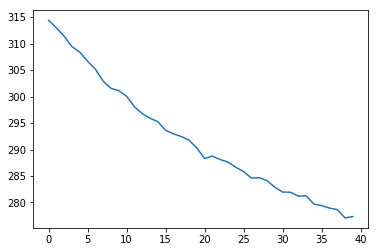

In [11]:
H = model.fit(train_x, train_y, epochs=40, batch_size=16, verbose=0)
print("training complete!!")
losses = H.history['loss']
plt.plot(losses)

When it's training, let's explain a little bit about the last two lines of the above code.

~~~python
opt = optimizers.adam(lr=.001)
~~~

This line of code indicates that the neural network will use an optimization method called "Adam" to learn the underlying mapping correlation between the house features and the price. We don't need to understand exactly how Adam works now, we just need to know that there are several methods for neural networks to learn stuff, and Adam is one of them.

~~~python
model.compile(optimizer=opt, loss='mse')
~~~

And the last line of code loads the Adam optimization method onto the neural network model, and it sets a learning objective called "mse", which stands for mean squared error. This is very easy to understand, let's think of it this way:

For every row in the training data, we have 13 features as $x$ to represent a house, they will be fed into the neural network model as a 13-d vector and do a bunch of calculations. And as a result, the model will output a value as the predicted price for that house, we denote it as $\hat{y}$.

Initially, all the parameters in the model are randomly generated, so we will receive a very strange $\hat{y}$ in that it is very different from the real price $y$. Now we need to inform the neural network that what it predicted is wrong, and we can quantify the error with 

$error=(y - \hat{y})^2$.

Mathematically, it is called the squared error or squared distance. And remember, there are 9,000 records in our training set, so there should be 9,000 errors. We take the average (or mean) of all the errors to represent the performance of the neural network on the training set

$E = {1 \over 9000} \sum{(y - \hat{y})^2}$

Therefore, the greater $E$ is, the poorer the model performs. And minimizing this value is the goal of the training, so we set the objective as "mse", which is exactly what $E$ is.

And what the neural network is doing during training is to iteratively adjust all its parameters so that after each iteration, the value of $E$ will be smaller than that in the previous iteration.

Remember how we divided the price by 10,000? This is why we did that.

First, the original values will result in this $E$ value to be huge which in turn may introduce trouble when computers are processing huge values.

Second, it will slow down the learning process. 

Now let's check our performance on the testing set. We sample 100 records from the testing set and draw their true and predicted prices in a diagram, see if the model is good:

In [13]:
sample_houses = test_x[:100]
sample_prices = test_y[:100]

preds = model.predict(sample_houses)

# restore the price original values
predicted_prices = preds * 10000
sample_prices = sample_prices * 10000

Total price difference of the 100 housing records: $11,463,004.50
38 records which have difference greater than $100,000


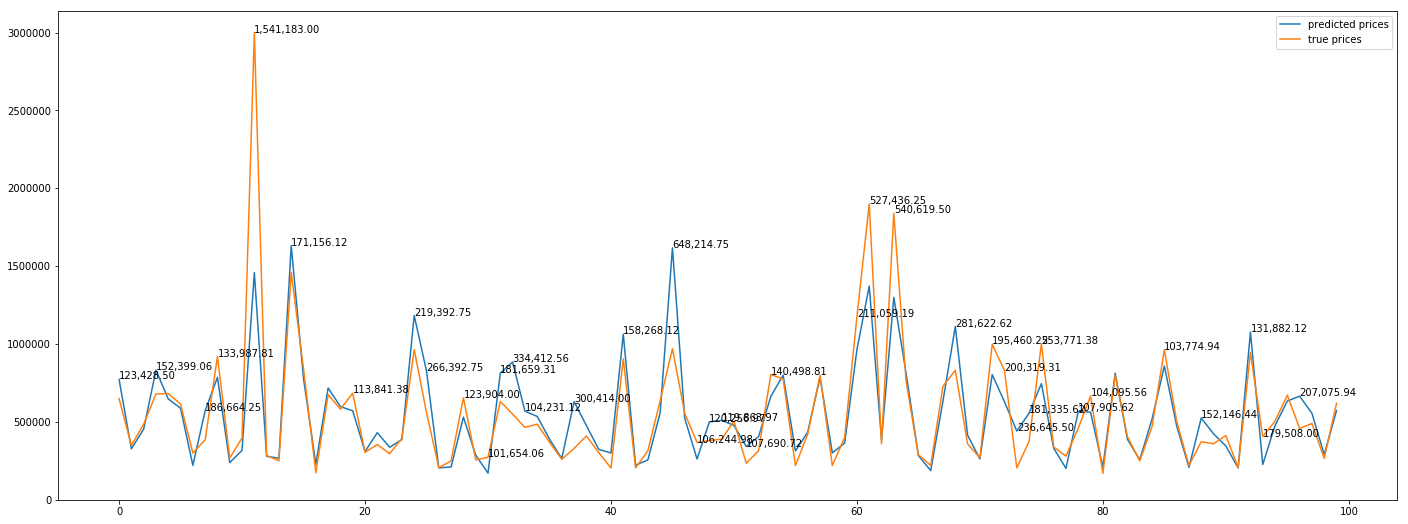

In [14]:
plt.figure(figsize=(24, 9))
plt.plot(predicted_prices, label='predicted prices')
plt.plot(sample_prices, label='true prices')
plt.ylim(bottom=0)
plt.legend()

diff = abs(sample_prices - predicted_prices)
count = 0
for i, d in enumerate(diff):
    d = d[0]
    if d <= 100000:
        continue
    plt.text(i, max(sample_prices[i], predicted_prices[i]), "{:,.2f}".format(d))
    count += 1

print("Total price difference of the 100 housing records: ${:,.2f}".format(diff.sum()))
print("{} records which have difference greater than $100,000".format(count))


From this diagram we can see that the performance actually is not bad. However, it's far from application-level performance.

But we notice that in this neural network model, there's 1 hidden layer and 21 neurons in total, which is a fairly simple and shallow network. Recall that we say neural nets with hidden layers ≥ 2 are considered "deep" neural networks, let's try using "deep learning" to solve this same problem:

training complete!!!


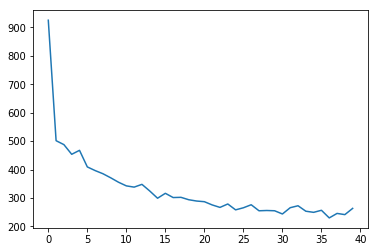

In [15]:
from keras.layers import Dropout, regularizers

model2 = Sequential()
model2.add(Dense(50, input_shape=(13,), activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(.3))
model2.add(Dense(60, activation='relu'))
model2.add(Dropout(.3))
model2.add(Dense(1, activation='relu', kernel_regularizer=regularizers.l2()))

opt = optimizers.adam(lr=.001)
model2.compile(optimizer=opt, loss='mse')
H1 = model2.fit(train_x, train_y, epochs=40, batch_size=16, validation_data=(test_x, test_y), verbose=0)
print("training complete!!!")
plt.plot(H1.history['loss'])

Compare to our previous model, this time we have 2 hidden layers, with 100 and 60 neurons respectively, and we added dropout and l2 regularization, these are common strategies in deep learning to prevent models from "memorizing the answer". We will cover those topics in later courses.

Now we checkout the new performance:

Total price difference of the 100 housing records: $9,309,383.48
26 records which have difference greater than $100,000


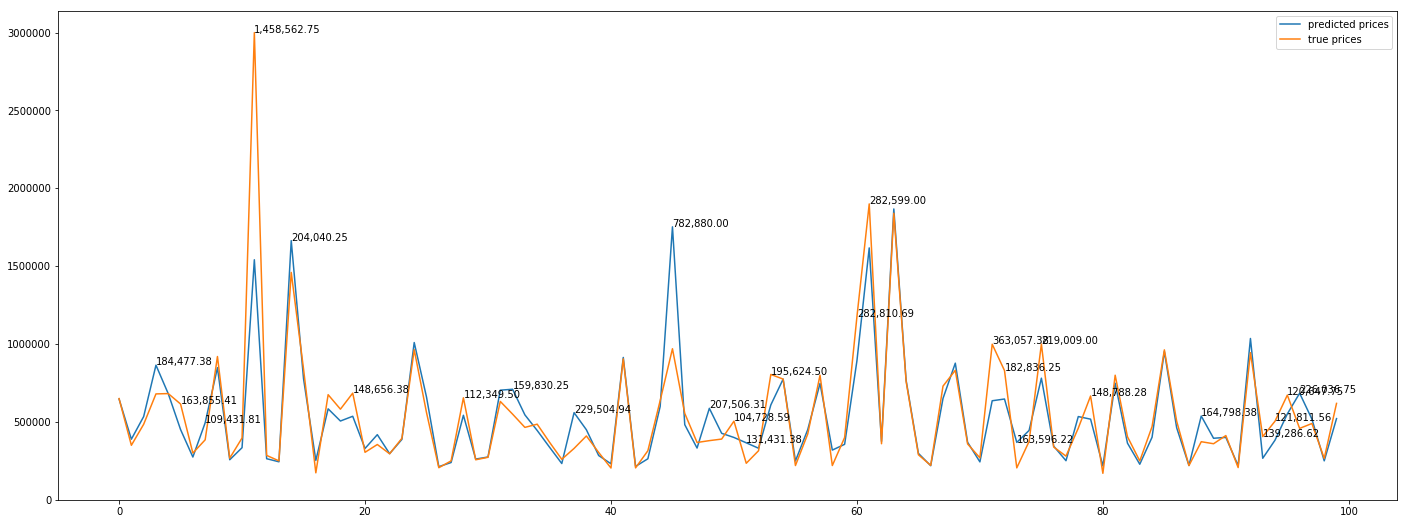

In [16]:
sample_houses = test_x[:100]
sample_prices = test_y[:100]

preds2 = model2.predict(sample_houses)

# restore the prices
predicted_prices2 = preds2 * 10000
sample_prices = sample_prices * 10000


plt.figure(figsize=(24, 9))
plt.plot(predicted_prices2, label='predicted prices')
plt.plot(sample_prices, label='true prices')
plt.ylim(bottom=0)
plt.legend()

diff = abs(sample_prices - predicted_prices2)
count = 0
for i, d in enumerate(diff):
    d = d[0]
    if d <= 100000:
        continue
    plt.text(i, max(sample_prices[i], predicted_prices2[i]), "{:,.2f}".format(d))
    count += 1

print("Total price difference of the 100 housing records: ${:,.2f}".format(diff.sum()))
print("{} records which have difference greater than $100,000".format(count))